In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [5]:
titandataset = pd.read_csv("tested.csv")

In [6]:
titandataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
titandataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
titandataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


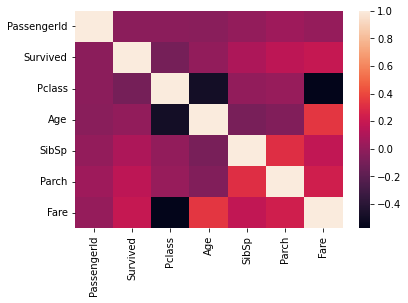

In [10]:
import seaborn as sns
sns.heatmap(titandataset.corr())
sns.color_palette("cubehelix", as_cmap=True)
plt.show()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2)
for train_indices, test_indices in split.split(titandataset, titandataset[["Survived","Pclass", "Sex"]]):
    strat_train_set = titandataset.loc[train_indices]
    strat_test_set = titandataset.loc[test_indices]

In [12]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
209,1101,0,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,NaN,S
177,1069,0,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,11778,55.4417,C116,C
310,1202,0,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,8.6625,NaN,S
162,1054,1,2,"Wright, Miss. Marion",female,26.0,0,0,220844,13.5000,NaN,S
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
199,1091,1,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,NaN,0,0,65305,8.1125,NaN,S
70,962,1,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


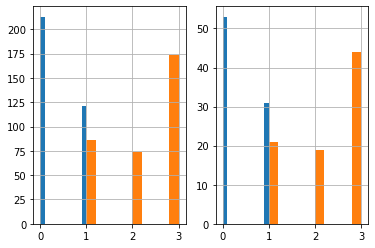

In [13]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [14]:
titandataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
titandataset.drop(columns=['Cabin','PassengerId' ], inplace=True)
titandataset.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [16]:
titandataset.dropna(inplace=True)
titandataset.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
titandataset.shape

(331, 10)

In [18]:
titandataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  331 non-null    int64  
 1   Pclass    331 non-null    int64  
 2   Name      331 non-null    object 
 3   Sex       331 non-null    object 
 4   Age       331 non-null    float64
 5   SibSp     331 non-null    int64  
 6   Parch     331 non-null    int64  
 7   Ticket    331 non-null    object 
 8   Fare      331 non-null    float64
 9   Embarked  331 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 28.4+ KB


In [20]:
titandataset['Initial'] = 0
for i in titandataset:
    titandataset['Initial'] = titandataset['Name'].str.extract('([A-Za-z]+)\.')

In [21]:
titandataset['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [23]:
titandataset.loc[(titandataset.Age.isnull())&(titandataset.Initial=='Mr'),'Age']=33
titandataset.loc[(titandataset.Age.isnull())&(titandataset.Initial=='Mrs'),'Age']=36
titandataset.loc[(titandataset.Age.isnull())&(titandataset.Initial=='Master'),'Age']=5
titandataset.loc[(titandataset.Age.isnull())&(titandataset.Initial=='Miss'),'Age']=22
titandataset.loc[(titandataset.Age.isnull())&(titandataset.Initial=='Other'),'Age']=46

In [25]:
titandataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  331 non-null    int64  
 1   Pclass    331 non-null    int64  
 2   Name      331 non-null    object 
 3   Sex       331 non-null    object 
 4   Age       331 non-null    float64
 5   SibSp     331 non-null    int64  
 6   Parch     331 non-null    int64  
 7   Ticket    331 non-null    object 
 8   Fare      331 non-null    float64
 9   Embarked  331 non-null    object 
 10  Initial   331 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 31.0+ KB


In [26]:
titandataset.drop(columns=['Name','Initial', 'Ticket'], inplace=True)
df_d = pd.get_dummies(titandataset,drop_first=True)

In [27]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    331 non-null    int64  
 1   Pclass      331 non-null    int64  
 2   Age         331 non-null    float64
 3   SibSp       331 non-null    int64  
 4   Parch       331 non-null    int64  
 5   Fare        331 non-null    float64
 6   Sex_male    331 non-null    uint8  
 7   Embarked_Q  331 non-null    uint8  
 8   Embarked_S  331 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 19.1 KB


In [28]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [29]:
X = df_d.drop(columns = "Survived")
y = df_d['Survived']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [31]:
log.fit(X_train,y_train)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred = log.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

1.0

In [34]:
roc_auc_score(y_test,y_pred)

1.0